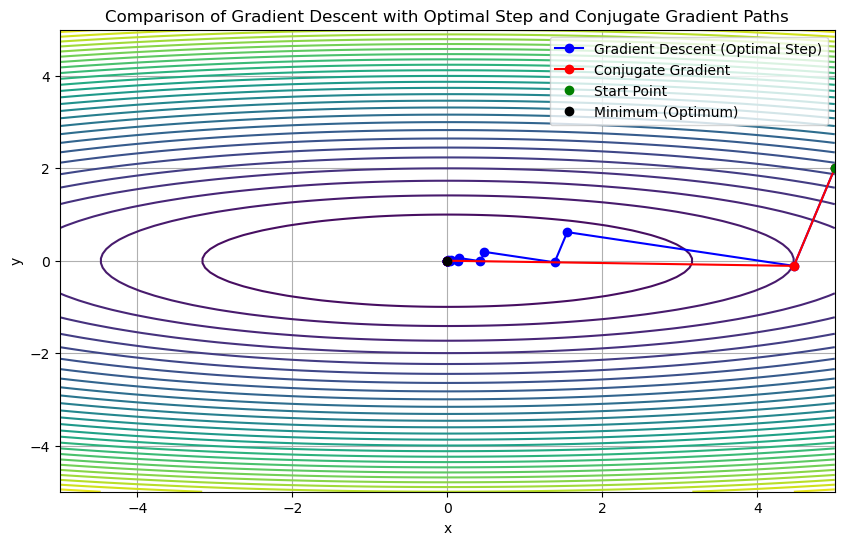

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize


# Define a simple quadratic function for optimization
def func(x):
    return 0.5 * (x[0] ** 2 + 10 * x[1] ** 2)


# Define the gradient of the function
def grad(x):
    return np.array([x[0], 10 * x[1]])


# Gradient Descent with optimal step size using line search
def gradient_descent_optimal_step(starting_point, n_iterations=50):
    path = [starting_point]
    x = starting_point.copy()

    for _ in range(n_iterations):
        g = grad(x)

        # Perform line search to find optimal step size
        res = minimize_scalar(lambda alpha: func(x - alpha * g))
        optimal_step_size = res.x

        # Update x using the optimal step size
        x = x - optimal_step_size * g
        path.append(x.copy())

    return np.array(path)


# Conjugate Gradient method using scipy's minimize
def conjugate_gradient(starting_point):
    result = minimize(
        func, starting_point, method="CG", jac=grad, options={"return_all": True}
    )
    return np.array(result.allvecs)


# Initial point
starting_point = np.array([5.0, 2.0])

# Get paths for both methods
gd_optimal_path = gradient_descent_optimal_step(starting_point, n_iterations=25)
cg_path = conjugate_gradient(starting_point)

# Plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])

plt.figure(figsize=(10, 6))
# Contour plot of the function
plt.contour(X, Y, Z, levels=30, cmap="viridis")

# Plot Gradient Descent with optimal step size path
plt.plot(
    gd_optimal_path[:, 0],
    gd_optimal_path[:, 1],
    "o-",
    label="Gradient Descent (Optimal Step)",
    color="blue",
)

# Plot Conjugate Gradient path
plt.plot(cg_path[:, 0], cg_path[:, 1], "o-", label="Conjugate Gradient", color="red")

# Start and end points
plt.plot(starting_point[0], starting_point[1], "go", label="Start Point")
plt.plot(0, 0, "ko", label="Minimum (Optimum)")

plt.xlabel("x")
plt.ylabel("y")
plt.title(
    "Comparison of Gradient Descent with Optimal Step and Conjugate Gradient Paths"
)
plt.legend()
plt.grid()
plt.show()

In [1]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import cg

P = np.array([[4, 0, 1, 0], [0, 5, 0, 0], [1, 0, 3, 2], [0, 0, 2, 4]])
A = csc_matrix(P)
b = np.array([-1, -0.5, -1, 2])
x, exit_code = cg(A, b, atol=1e-5)
print(exit_code)  # 0 indicates successful convergence


np.allclose(A.dot(x), b)

0


True